# History Embedding

> Embed an environment into a more complex representation of state/observation-action histories

In [2]:
#| default_exp Environments/HistoryEmbedding

In [3]:
#| hide
# Imports for the nbdev development environment
from nbdev.showdoc import *
from fastcore.test import *

In [4]:
#| hide
%load_ext autoreload
%autoreload 2

## Examples

In [5]:
#|eval: true notest
import numpy as np
import matplotlib.pyplot as plt

from pyCRLD.Environments.SocialDilemma import SocialDilemma
from pyCRLD.Environments.EcologicalPublicGood import EcologicalPublicGood

from pyCRLD.Agents.StrategyActorCritic import stratAC
from pyCRLD.Utils import FlowPlot as fp

np.random.seed(42)

In [6]:
from pyCRLD.Environments.HistoryEmbedding import HistoryEmbedded

In [7]:
ecopg = EcologicalPublicGood(N=2, f=1.2, c=5, m=-5, qc=0.2, qr=0.1)

### Memory-one Ecological Public Good

What is the effect of condition actions also on the past actions in the ecological public goods envrionment?

In [24]:
ecopg2 = HistoryEmbedded(ecopg, h=(1,0,0))



[[',,g|', ',,p|'], [',,g|', ',,p|']]
[[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]


In [ ]:
ecopg1 = HistoryEmbedded(ecopg, h=(1,1,1))
ecopg1.Oset = 
print(ecopg1.Oset)
print(ecopg1.O)


[['g', 'p'], ['g', 'p']]



[['c,c,g|', 'c,c,p|', 'c,d,g|', 'c,d,p|', 'd,c,g|', 'd,c,p|', 'd,d,g|', 'd,d,p|'], ['c,c,g|', 'c,c,p|', 'c,d,g|', 'c,d,p|', 'd,c,g|', 'd,c,p|', 'd,d,g|', 'd,d,p|']]
[[[1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1.]]

 [[1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1.]]]


[['g', 'p'], ['g', 'p']]

In [18]:
ecopg1_partial = HistoryEmbedded(ecopg, h=(1,1,1))
ecopg1_partial.Oset = [['g', 'p'], ['g', 'p']]
ecopg1_partial.baseenv.__dict__


{'N': 2,
 'M': 2,
 'Z': 2,
 'f': Array([1.2, 1.2], dtype=float32, weak_type=True),
 'c': Array([5, 5], dtype=int32, weak_type=True),
 'm': Array([-5, -5], dtype=int32, weak_type=True),
 'qc': Array([0.2, 0.2], dtype=float32, weak_type=True),
 'qr': Array([0.1, 0.1], dtype=float32, weak_type=True),
 'degraded_choice': False,
 'Aset': [['c', 'd'], ['c', 'd']],
 'Sset': ['g', 'p'],
 'state': 1,
 'T': array([[[[0.89999998, 0.1       ],
          [0.89999998, 0.1       ]],
 
         [[0.89999998, 0.1       ],
          [0.89999998, 0.1       ]]],
 
 
        [[[0.        , 1.        ],
          [0.1       , 0.9       ]],
 
         [[0.1       , 0.9       ],
          [0.2       , 0.8       ]]]]),
 'F': array([0, 0]),
 'R': array([[[[[-5., -5.],
           [-5., -5.]],
 
          [[-5., -5.],
           [-5., -5.]]],
 
 
         [[[-5.,  1.],
           [-5., -2.]],
 
          [[-5.,  3.],
           [-5.,  0.]]]],
 
 
 
        [[[[-5., -5.],
           [-5., -5.]],
 
          [[-5.,

Visualizing the flow of learning in the prosperous state:

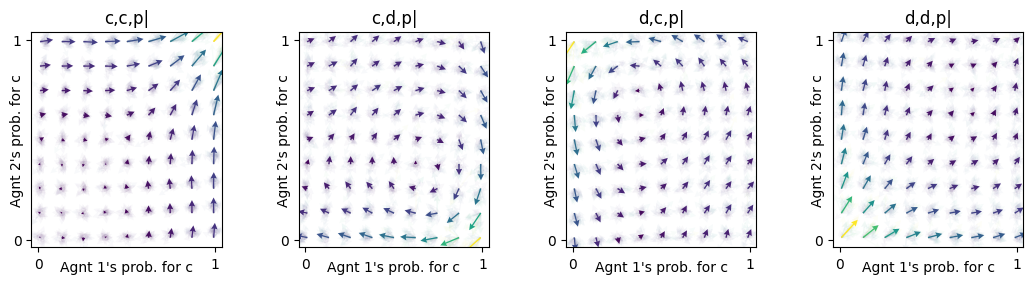

In [10]:
mae1 = stratAC(env=ecopg1, learning_rates=0.1, discount_factors=0.9)
x = ([0], [1,3,5,7], [0])
y = ([1], [1,3,5,7], [0])
ax = fp.plot_strategy_flow(mae1, x, y, flowarrow_points=np.linspace(0.01 ,0.99, 9), NrRandom=32,
                           conds=np.array(mae1.env.Sset)[[1,3,5,7]])

This flow has similarites to the flow of the memory-1 Prisoner's Dilemma above, yet with more tendency toward cooperation. This is expected, since the ecological public good without memory-1 has also more tendency towards cooperation.